In [ ]:
%config Completer.use_jedi = False

In [ ]:
import pandas as pd
import numpy as np
from pathlib import Path
from fastai.vision.data import ImageList
from fastai.vision.transform import rotate, crop, brightness, contrast, get_transforms
from fastai.vision.data import imagenet_stats
from fastprogress.fastprogress import progress_bar

In [ ]:
img_path = Path(r'C:\Users\vik10486\Downloads\dataset\train')
df = pd.read_csv(r'C:/Users/vik10486/Downloads/dataset/train.csv')

def get_y_func(x):
    return df.loc[df['image_ID']==Path(x).name].iat[0,1]

kwargs_transforms = {}
transforms = get_transforms(max_rotate=30, max_zoom=3.0, max_lighting=0.5)
kwargs_transforms["size"] = 224

data = (ImageList.from_df(df, img_path)
        .split_by_rand_pct()
        .label_from_func(get_y_func)
        .transform(transforms, **kwargs_transforms)
        .databunch(bs=16)
        .normalize(imagenet_stats)
       )
data

ImageDataBunch;

Train: LabelList (6582 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Badminton,Badminton,Badminton,Badminton,Badminton
Path: C:\Users\vik10486\Downloads\dataset\train;

Valid: LabelList (1645 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Badminton,Badminton,Wrestling,Tennis,Cricket
Path: C:\Users\vik10486\Downloads\dataset\train;

Test: None

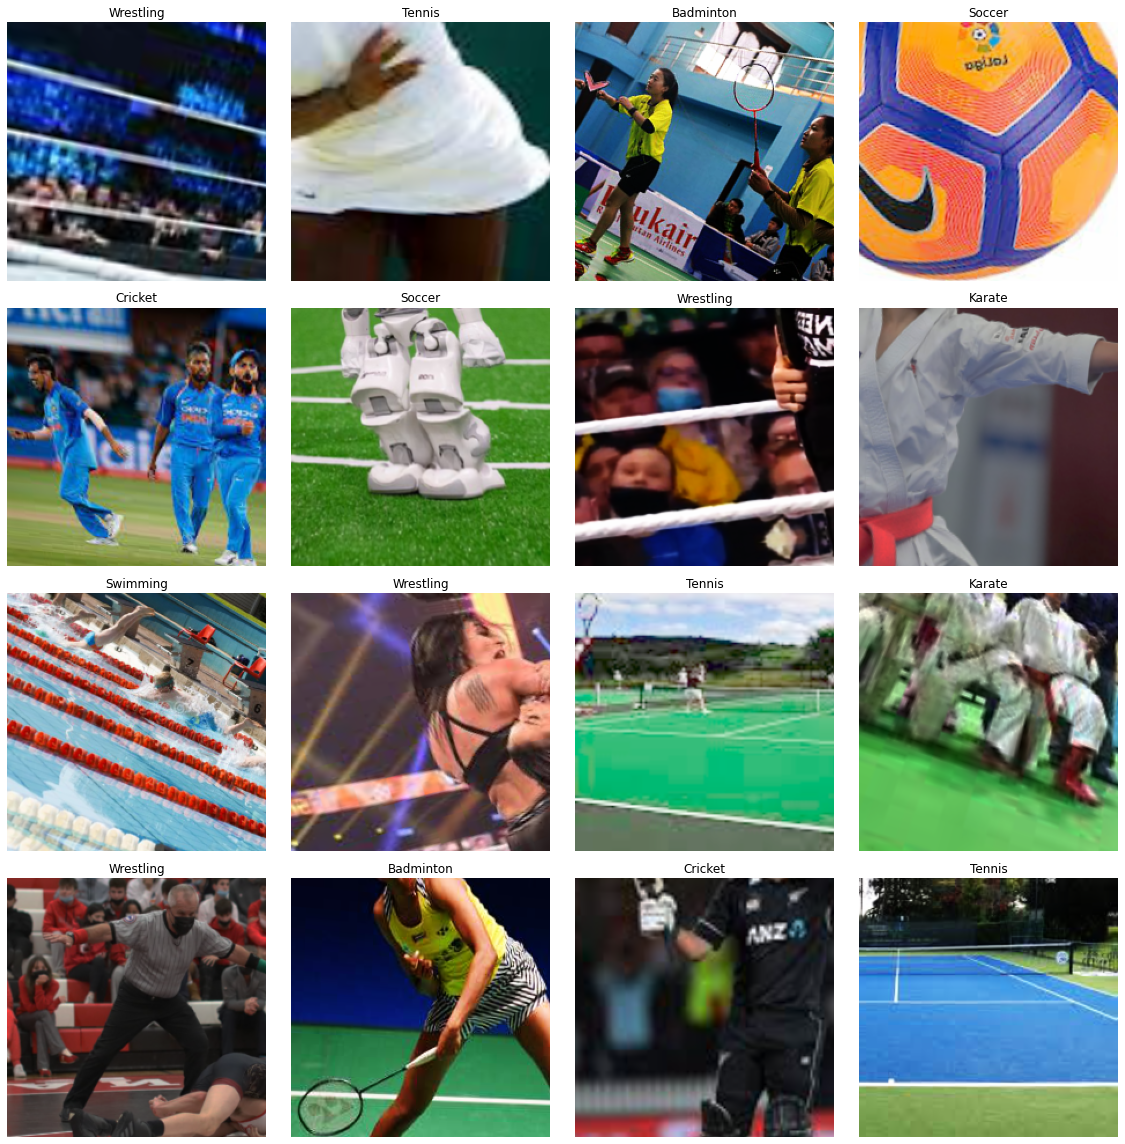

In [ ]:
data.show_batch()

In [ ]:
from fastai.vision.learner import cnn_learner
from fastai.metrics import accuracy
from torchvision.models import resnet50
learn = cnn_learner(data, resnet50, metrics=accuracy)

In [ ]:
learn.fit_one_cycle(10)

In [ ]:
learn.save(Path(r'C:\Users\vik10486\Downloads\dataset\models'))

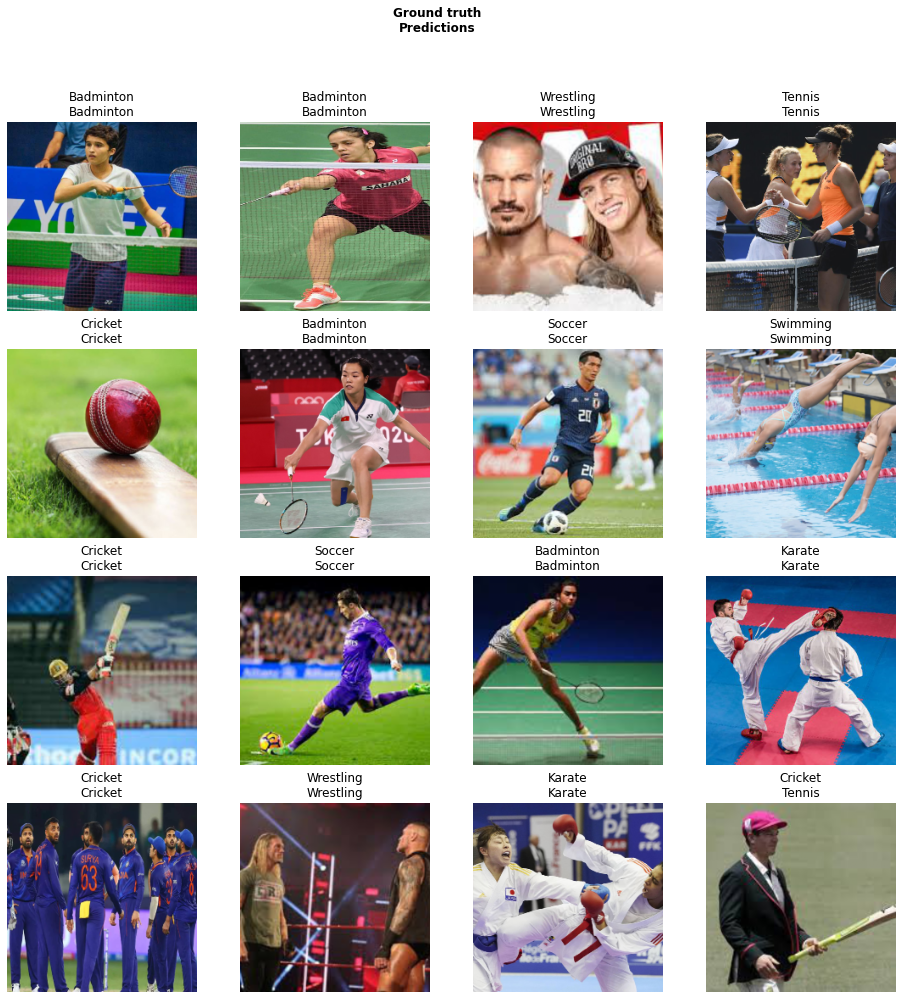

In [ ]:
learn.show_results()

In [ ]:
from fastai.vision import open_image
test_df = pd.read_csv(r'C:/Users/vik10486/Downloads/dataset/test.csv')
test_path = Path(r'C:\Users\vik10486\Downloads\dataset\test')

In [ ]:
pred = []
for i in progress_bar(range(test_df.shape[0])):
    pred.append([test_df.iat[i,0], data.y.classes[learn.predict(open_image(test_path/test_df.iat[i,0]))[1]]])

In [ ]:
df_result = pd.DataFrame(pred, columns =['image_ID', 'label'])
df_result

image_ID      label
0     f5e13966e7.jpg     Soccer
1     6674191b4e.jpg     Tennis
2     91b5f8b7a9.jpg  Badminton
3     393119b6d6.jpg  Wrestling
4     1ce5f81578.jpg     Tennis
...              ...        ...
2051  7be6c552a7.jpg     Tennis
2052  4c9427f2a5.jpg   Swimming
2053  0f429ae0d4.jpg  Wrestling
2054  a6557bedd9.jpg   Swimming
2055  76266fd445.jpg    Cricket

[2056 rows x 2 columns]

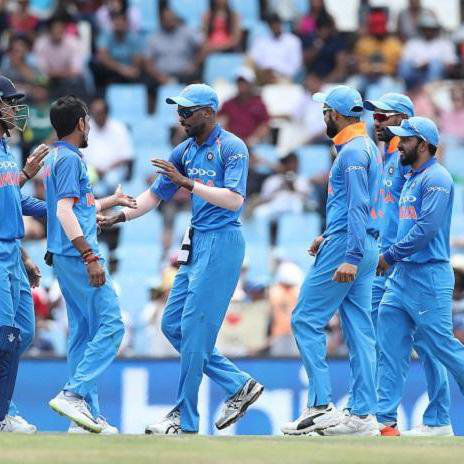

In [ ]:
open_image(test_path/df_result.iat[2055,0])

In [ ]:
csv_result = Path(r'C:\Users\vik10486\Downloads\dataset\test_submmision.csv')
df_result.to_csv(csv_result, index=False)